<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [23]:
#!pip install pandas
#!pip install matplotlib

Import pandas module


In [24]:
import pandas as pd


Import matplotlib


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [26]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [27]:
df.shape

(65457, 114)

In [28]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

20

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [29]:
duplicated_rows[['MainBranch', 'Employment', 'RemoteWork']]

,MainBranch,Employment,RemoteWork
65437,I am a developer by profession,"Employed, full-time",Remote
65438,I am a developer by profession,"Employed, full-time",Remote
65439,I am a developer by profession,"Employed, full-time",Remote
65440,I am learning to code,"Student, full-time",NaN
65441,I am a developer by profession,"Student, full-time",NaN
65442,I code primarily as a hobby,"Student, full-time",NaN
65443,"I am not primarily a developer, but I write co...","Employed, full-time",Remote
65444,I am learning to code,"Student, full-time;Not employed, but looking f...",NaN
65445,I code primarily as a hobby,"Employed, full-time",In-person
65446,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Remote


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


C:\Users\Imane\AppData\Local\Temp\ipykernel_32876\4291608330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='muted', ax=axs[0])
C:\Users\Imane\AppData\Local\Temp\ipykernel_32876\4291608330.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_counts.index, y=employment_counts.values, palette='muted', ax=axs[1])


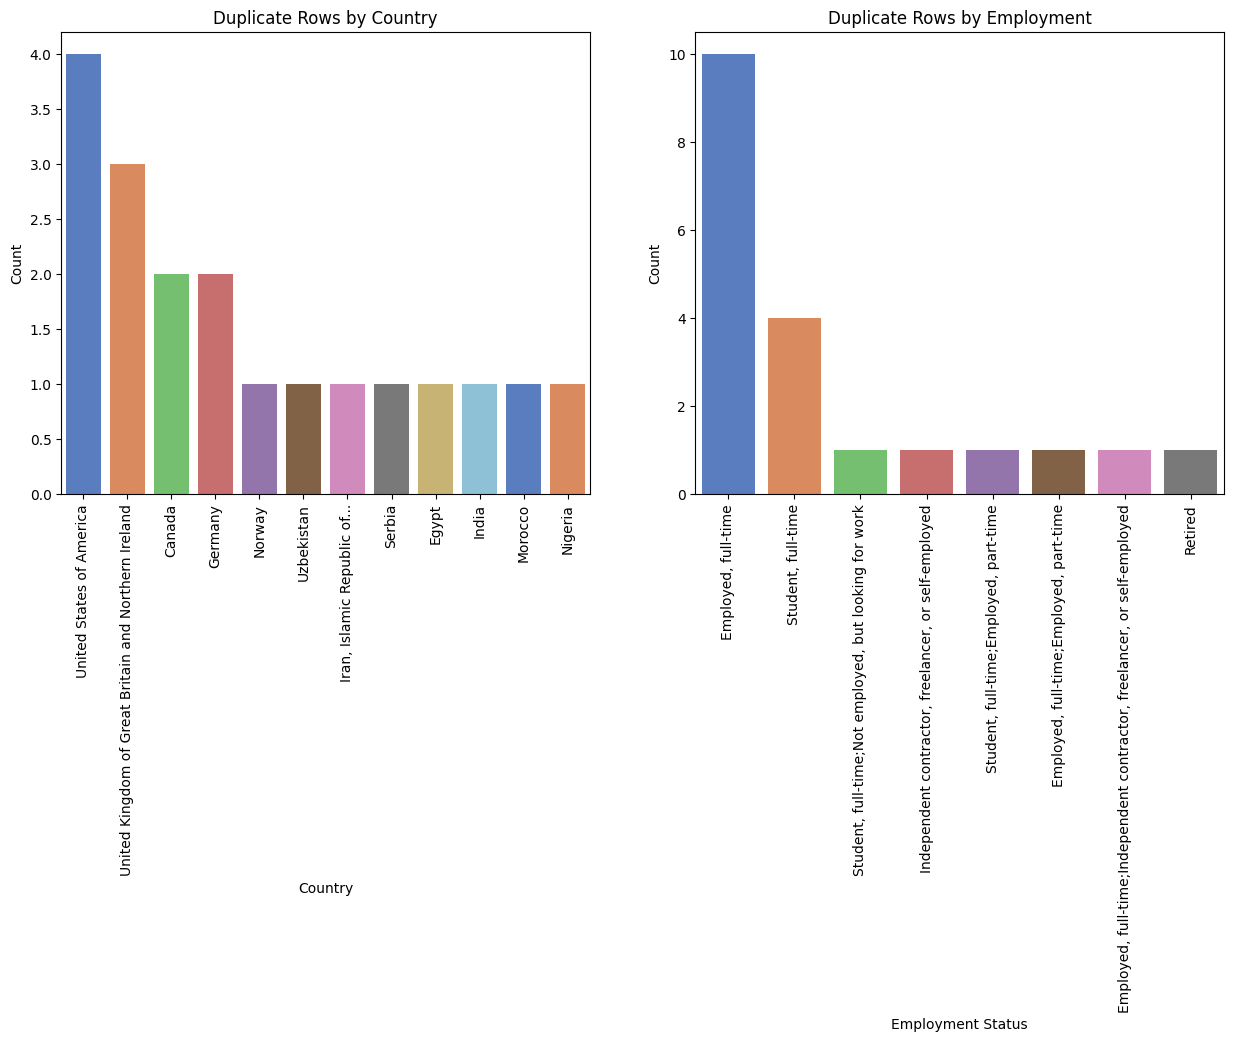

In [30]:
country_counts = duplicated_rows['Country'].value_counts()
employment_counts = duplicated_rows['Employment'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

sns.barplot(x=country_counts.index, y=country_counts.values, palette='muted', ax=axs[0])
axs[0].set_title('Duplicate Rows by Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)

sns.barplot(x=employment_counts.index, y=employment_counts.values, palette='muted', ax=axs[1])
axs[1].set_title('Duplicate Rows by Employment')
axs[1].set_xlabel('Employment Status')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [40]:
critical_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Country']

In [48]:
delete_duplicated_rows = duplicated_rows.drop_duplicates(subset=critical_columns, keep='first')
print(delete_duplicated_rows.shape)
print(df.shape)
print(f"Removed {len(delete_duplicated_rows)} duplicate rows.")

(19, 114)
(65457, 114)
Removed 19 duplicate rows.


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


In [49]:
delete_duplicated_rows.duplicated(subset=critical_columns).sum()

np.int64(0)

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


In [ ]:
#To identify and remove duplicates meaningfully, we selected the columns MainBranch, Employment, RemoteWork, and Country because they represent 
# the core characteristics that define a unique respondent in the dataset. These columns capture a person's professional role, employment status, 
# work setting, and geographic location—factors that are unlikely to repeat exactly unless the entry is a true duplicate. We excluded fields like 
# ResponseId or ConvertedCompYearly because they may differ across rows even if the responses are essentially the same, and using them could prevent 
# detection of near-identical duplicates. This targeted approach ensures we preserve the integrity of genuine responses while cleaning out redundant 
# or mistakenly repeated entries.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
